In [2]:
%load_ext autoreload
%autoreload 2

mental.py loaded!


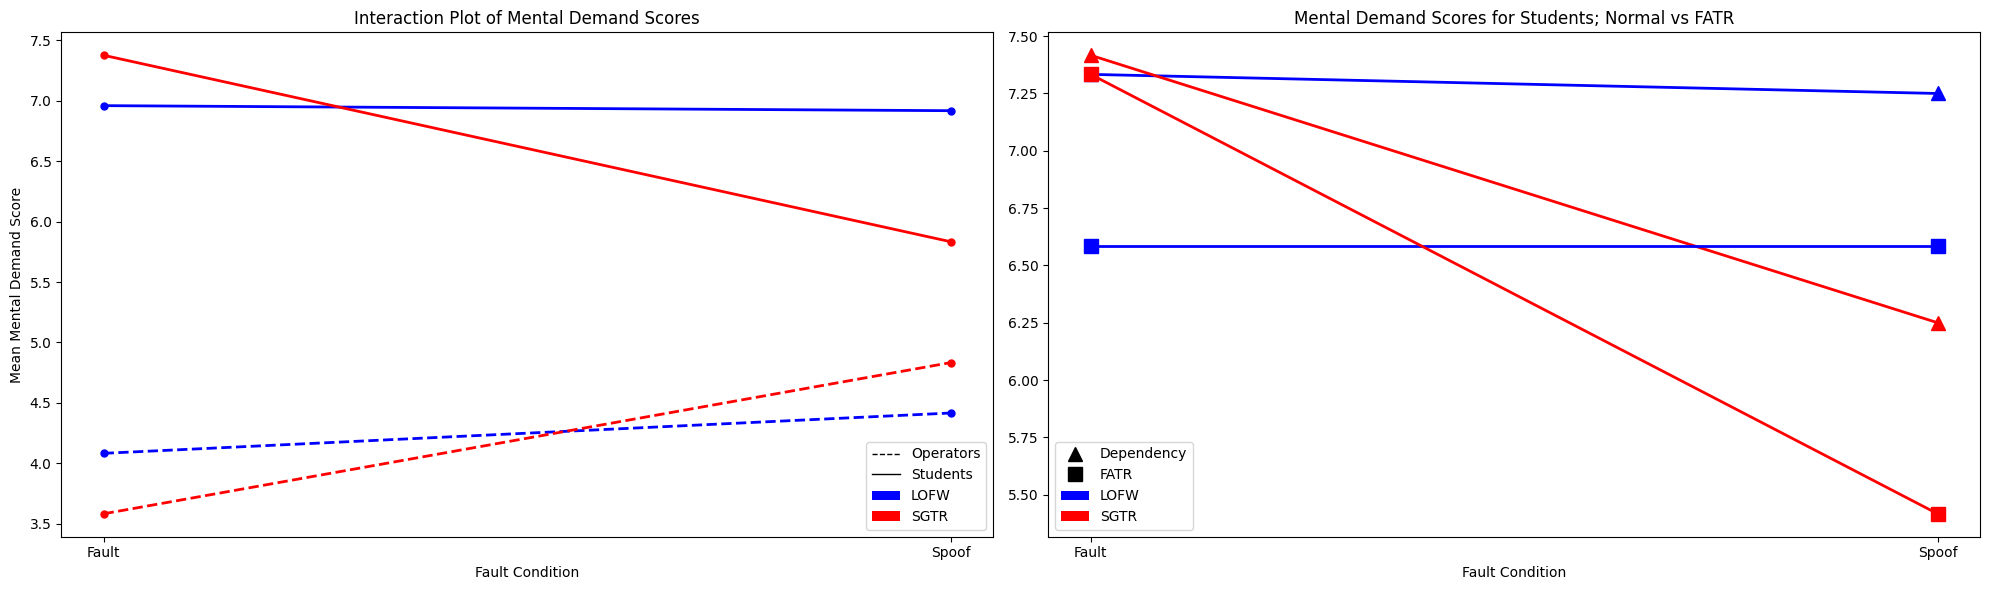

In [3]:
import matplotlib.pyplot as plt
import sys
import os
from IPython.display import display, Markdown

sys.path.append('plot') 

import mental

# Load the dataset
data_path = 'SCORES.csv'  # Adjust the path as necessary
new_data = mental.load_data(data_path)

# Prepare the data
operators, students, mean_scores_students = mental.prepare_data(new_data)

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Plot using the specific axes
mental.plot_interaction_scores(operators, students, ax=axs[0])
mental.plot_mental_demand_scores(mean_scores_students, ax=axs[1])

plt.tight_layout()
plt.show()


##### **Figure 1.** A) Interaction of mental demand scores for both operators and student particpants for Normal and FATR conditions. B) Student mental demand in the Normal and FATR condtions.


Discussion: 

1. Operators vs Student mental demand scores trend in opposite directions than students based on scenario, and show overall lower mean scores (check for significance).
2. Mental demand scores compared for only the students between Normal and FATR condtion show lower mean scores, and trend similarly for scenarios (check for significance).



In [4]:
from __future__ import print_function
from pyvttbl import DataFrame
import pandas as pd

# -- pvttbl methods
df.write(fname='test.csv')
df = DataFrame()
df.read_tbl('SCORES.csv')
# print(df)

# -- pandas
df2 = pd.read_csv('SCORES.csv')
print(df2.head())

ModuleNotFoundError: No module named 'pyvttbl'

In [29]:
dv1 = "Mental Demand"
pt = df.pivot(dv1, ['Skill'], ['Scenario'])
print(pt)
print("\n\n")
pt = df.pivot(dv1, ['Fault Condition'], ['Scenario'])
print(pt)

avg(Mental Demand)
 Skill     Scenario=LOFW   Scenario=SGTR   Total 
Operator           4.250           4.208   4.229 
Student            6.938           6.604   6.771 
Total              6.042           5.806   5.924 



avg(Mental Demand)
Fault Condition   Scenario=LOFW   Scenario=SGTR   Total 
Fault                         6           6.111   6.056 
Spoof                     6.083           5.500   5.792 
Total                     6.042           5.806   5.924 


In [28]:
dv1 = "Temporal Demand"
pt = df.pivot(dv1, ['Skill'], ['Scenario'])
print(pt)
print("\n\n")
pt = df.pivot(dv1, ['Fault Condition'], ['Scenario'])
print(pt)

avg(Temporal Demand)
 Skill     Scenario=LOFW   Scenario=SGTR   Total 
Operator           2.792           2.833   2.812 
Student            5.917           5.521   5.719 
Total              4.875           4.625   4.750 



avg(Temporal Demand)
Fault Condition   Scenario=LOFW   Scenario=SGTR   Total 
Fault                     4.722           4.667   4.694 
Spoof                     5.028           4.583   4.806 
Total                     4.875           4.625   4.750 


In [30]:
dv1 = "Perform."
pt = df.pivot(dv1, ['Skill'], ['Scenario'])
print(pt)
print("\n\n")
pt = df.pivot(dv1, ['Fault Condition'], ['Scenario'])
print(pt)

avg(Perform.)
 Skill     Scenario=LOFW   Scenario=SGTR   Total 
Operator           8.792           8.333   8.562 
Student            6.167           5.333   5.750 
Total              7.042           6.333   6.688 



avg(Perform.)
Fault Condition   Scenario=LOFW   Scenario=SGTR   Total 
Fault                     6.972           6.361   6.667 
Spoof                     7.111           6.306   6.708 
Total                     7.042           6.333   6.688 


In [68]:
#df2 is a pandas dataframe.
filtered_df2 = df2[df2['Skill'] == 'Student']
#this works

#df is a pvttbl dataframe

df.where_update([('Skill', '=', "Student")])

### Multidemensional Pivot
```
df.read_tbl('suppression~subjectXgroupXageXcycleXphase.csv')

pt = df.pivot('SUPPRESSION',
                  rows=['CYCLE', 'PHASE'],
                  cols=['GROUP', 'AGE'])
print(pt)
```

In [40]:
dv1 = "Perform."
pt = df.pivot(dv1, 
              rows=['Study', 'Skill'],
              cols=['Scenario', 'Fault Condition'])
print(pt)

avg(Perform.)
  Study       Skill        Scenario=LOFW,          Scenario=LOFW,          Scenario=SGTR,          Scenario=SGTR,       Total 
                        Fault Condition=Fault   Fault Condition=Spoof   Fault Condition=Fault   Fault Condition=Spoof         
Dependency   Operator                   8.750                   8.833                   7.583                   9.083   8.562 
Dependency   Student                    7.083                   6.833                   7.333                   5.250   6.625 
FATR         Student                    5.083                   5.667                   4.167                   4.583   4.875 
Total                                   6.972                   7.111                   6.361                   6.306   6.688 


In [42]:
dv_values = ['Perform.', 'Mental Demand', 'Temporal Demand']

for dv in dv_values:
    print(f"Pivoting for: {dv}")
    pt = df.pivot(dv1, 
                  rows=['Study', 'Skill'],
                  cols=['Scenario', 'Fault Condition'])
    print(pt)
    print("\n\n")  # Print a separator for readability


Pivoting for: Perform.
avg(Perform.)
  Study       Skill        Scenario=LOFW,          Scenario=LOFW,          Scenario=SGTR,          Scenario=SGTR,       Total 
                        Fault Condition=Fault   Fault Condition=Spoof   Fault Condition=Fault   Fault Condition=Spoof         
Dependency   Operator                   8.750                   8.833                   7.583                   9.083   8.562 
Dependency   Student                    7.083                   6.833                   7.333                   5.250   6.625 
FATR         Student                    5.083                   5.667                   4.167                   4.583   4.875 
Total                                   6.972                   7.111                   6.361                   6.306   6.688 



Pivoting for: Mental Demand
avg(Perform.)
  Study       Skill        Scenario=LOFW,          Scenario=LOFW,          Scenario=SGTR,          Scenario=SGTR,       Total 
                        Fault

In [59]:
from pyvttbl.stats import Anova
# import pyvttbl
df = DataFrame()
df.read_tbl('SCORES.csv')

dv_values = ['Perform.', 'Mental Demand', 'Temporal Demand']

for dv in dv_values:
    print(f"Running ANOVA for: {dv}")
    
    aov = Anova()
    
    aov.run(df, dv, bfactors=['Scenario', 'Fault Condition'])
    
    print(aov)
    print("\n\n")

Running ANOVA for: Perform.
Perform. ~ Scenario * Fault Condition

TESTS OF BETWEEN-SUBJECTS EFFECTS

Measure: Perform.
          Source             Type III   df      MS       F     Sig.      et2_G     Obs.    SE     95% CI   lambda   Obs.  
                                SS                                                                                  Power 
Scenario                       72.250     1   72.250   9.697   0.002       0.065     18   0.649    1.272    1.247   0.198 
Fault Condition                 0.250     1    0.250   0.034   0.855   2.396e-04     18   0.649    1.272    0.004   0.050 
Scenario * Fault Condition      1.361     1    1.361   0.183   0.670       0.001      9   0.918    1.799    0.012   0.051 
Error                        1043.076   140    7.451                                                                      
Total                        1116.938   143                                                                               

TABLES OF ESTIMATE

ValueError: could not convert string to float: '\x00\x00\x00\x00\x00\x00\x00\x00'